# 🚀 Strategic IT Opportunity Matrix
### MSP Portfolio | Client-Facing Technology Roadmap
---
**Audience:** SMB & Legal Sector Clients  
**Purpose:** Quantify the upside of adopting recommended IT solutions  
**Companion:** FAIR IT Risk Register — cross-referenced where adoption reduces ALE

This matrix evaluates each technology opportunity across three dimensions:

| Dimension | What it measures |
|---|---|
| **ROI / Cost Savings** | Annual dollar value recovered or avoided |
| **Productivity Gain** | Hours saved × fully-loaded labour cost |
| **Security Posture** | ALE reduction achievable from the FAIR register |

Each opportunity receives a composite **Priority Score** (High / Medium / Low) and is mapped to a **Implementation Horizon** (Quick Win / Mid-Term / Strategic).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as pe
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# -- Shared style (matches FAIR register) ----------------------------------
plt.rcParams['figure.facecolor'] = '#0f172a'
plt.rcParams['axes.facecolor']   = '#1e293b'
plt.rcParams['axes.edgecolor']   = '#334155'
plt.rcParams['text.color']       = '#e2e8f0'
plt.rcParams['axes.labelcolor']  = '#e2e8f0'
plt.rcParams['xtick.color']      = '#94a3b8'
plt.rcParams['ytick.color']      = '#94a3b8'
plt.rcParams['grid.color']       = '#334155'
plt.rcParams['grid.alpha']       = 0.5
plt.rcParams['font.family']      = 'DejaVu Sans'

ACCENT  = '#38bdf8'
WARN    = '#fb923c'
DANGER  = '#f87171'
SUCCESS = '#4ade80'
PURPLE  = '#a78bfa'
GOLD    = '#fbbf24'

priority_colors = {'High': '#4ade80', 'Medium': '#fbbf24', 'Low': '#94a3b8'}
horizon_colors  = {'Quick Win': '#38bdf8', 'Mid-Term': '#a78bfa', 'Strategic': '#fb923c'}

print("✅ Libraries loaded.")


✅ Libraries loaded.


## 📋 Section 1 — Opportunity Register

In [2]:
# -------------------------------------------------------------------------
# Strategic IT Opportunity Matrix — Pre-populated for SMB + Legal Clients
#
# roi_annual      : hard dollar savings or cost avoidance per year
# hrs_saved_mo    : staff hours saved per month
# labour_rate     : fully-loaded hourly cost assumed for productivity calc
# security_ale_reduction : estimated ALE reduction (from FAIR register)
# fair_risks      : linked FAIR risk IDs that this solution improves
# effort_score    : 1 (easy) → 5 (complex) — implementation effort
# cost_annual     : estimated annual solution cost (licensing + MSP fees)
# -------------------------------------------------------------------------

opps_raw = [

    # -- COLLABORATION & PRODUCTIVITY --------------------------------------
    {
        "id": "COL-01",
        "solution": "Microsoft 365 Business Premium (Full Deployment)",
        "category": "Collaboration & Productivity",
        "sector": "SMB + Legal",
        "description": "Unified email, Teams, SharePoint, OneDrive with Intune MDM and Defender for Business included.",
        "roi_annual": 14000,
        "roi_notes": "Replaces standalone licensing; reduces shadow IT spend",
        "hrs_saved_mo": 18,
        "labour_rate": 55,
        "security_ale_reduction": 22000,
        "fair_risks": "CYB-03, CYB-04, OPS-04",
        "effort_score": 2,
        "cost_annual": 9500,
        "horizon": "Quick Win",
    },
    {
        "id": "COL-02",
        "solution": "Secure Client Portal (Matter / Document Sharing)",
        "category": "Collaboration & Productivity",
        "sector": "Legal",
        "description": "Encrypted client-facing portal replacing email for sensitive document exchange and matter updates.",
        "roi_annual": 8000,
        "roi_notes": "Reduces admin overhead; eliminates courier & print costs",
        "hrs_saved_mo": 22,
        "labour_rate": 75,
        "security_ale_reduction": 48000,
        "fair_risks": "COM-01, CYB-05",
        "effort_score": 2,
        "cost_annual": 4800,
        "horizon": "Quick Win",
    },
    {
        "id": "COL-03",
        "solution": "Digital Signature & Contract Automation (DocuSign / Adobe Sign)",
        "category": "Collaboration & Productivity",
        "sector": "SMB + Legal",
        "description": "E-signature platform with workflow automation for contracts, onboarding, and compliance docs.",
        "roi_annual": 6500,
        "roi_notes": "Eliminates print/scan/courier; accelerates deal velocity",
        "hrs_saved_mo": 14,
        "labour_rate": 65,
        "security_ale_reduction": 5000,
        "fair_risks": "COM-03",
        "effort_score": 1,
        "cost_annual": 2400,
        "horizon": "Quick Win",
    },
    {
        "id": "COL-04",
        "solution": "VoIP / UCaaS Migration (Teams Phone / RingCentral)",
        "category": "Collaboration & Productivity",
        "sector": "SMB + Legal",
        "description": "Replace legacy PBX with cloud-hosted VoIP. Includes mobile softphone, call recording, and failover.",
        "roi_annual": 9000,
        "roi_notes": "Eliminates PBX maintenance; reduces per-seat telecom costs ~40%",
        "hrs_saved_mo": 8,
        "labour_rate": 55,
        "security_ale_reduction": 6000,
        "fair_risks": "BCP-03",
        "effort_score": 3,
        "cost_annual": 5500,
        "horizon": "Mid-Term",
    },

    # -- SECURITY TOOLING --------------------------------------------------
    {
        "id": "SEC-01",
        "solution": "Endpoint Detection & Response (EDR) — SentinelOne / CrowdStrike",
        "category": "Security Tooling",
        "sector": "SMB + Legal",
        "description": "AI-driven EDR with rollback capability, threat hunting, and 24/7 MDR overlay.",
        "roi_annual": 0,
        "roi_notes": "Primary value is ALE reduction, not direct cost savings",
        "hrs_saved_mo": 6,
        "labour_rate": 85,
        "security_ale_reduction": 55000,
        "fair_risks": "CYB-01, CYB-03, OPS-03",
        "effort_score": 2,
        "cost_annual": 8400,
        "horizon": "Quick Win",
    },
    {
        "id": "SEC-02",
        "solution": "Privileged Access Management (PAM) — CyberArk / Delinea",
        "category": "Security Tooling",
        "sector": "SMB + Legal",
        "description": "Vault and rotate privileged credentials; enforce just-in-time access for admin accounts.",
        "roi_annual": 0,
        "roi_notes": "ALE reduction primary; reduces audit & compliance cost secondarily",
        "hrs_saved_mo": 5,
        "labour_rate": 85,
        "security_ale_reduction": 38000,
        "fair_risks": "CYB-03, OPS-03, VND-01",
        "effort_score": 4,
        "cost_annual": 7200,
        "horizon": "Mid-Term",
    },
    {
        "id": "SEC-03",
        "solution": "Security Awareness Training — KnowBe4 / Proofpoint",
        "category": "Security Tooling",
        "sector": "SMB + Legal",
        "description": "Continuous phishing simulation, training modules, and compliance tracking for all staff.",
        "roi_annual": 3500,
        "roi_notes": "Reduces cyber insurance premiums; may satisfy insurer requirements",
        "hrs_saved_mo": 2,
        "labour_rate": 55,
        "security_ale_reduction": 28000,
        "fair_risks": "CYB-02, CYB-04, COM-01",
        "effort_score": 1,
        "cost_annual": 2800,
        "horizon": "Quick Win",
    },
    {
        "id": "SEC-04",
        "solution": "SIEM / SOC-as-a-Service — Microsoft Sentinel / Huntress",
        "category": "Security Tooling",
        "sector": "SMB + Legal",
        "description": "24/7 log aggregation, threat detection, and managed response. Satisfies cyber insurance log requirements.",
        "roi_annual": 4000,
        "roi_notes": "Reduces insurance premiums; replaces need for internal SOC hire",
        "hrs_saved_mo": 10,
        "labour_rate": 85,
        "security_ale_reduction": 42000,
        "fair_risks": "CYB-01, CYB-05, VND-01, OPS-03",
        "effort_score": 3,
        "cost_annual": 12000,
        "horizon": "Mid-Term",
    },
    {
        "id": "SEC-05",
        "solution": "Multi-Factor Authentication — Entra ID / Duo (All Systems)",
        "category": "Security Tooling",
        "sector": "SMB + Legal",
        "description": "Enforce MFA across all SaaS, VPN, RDP, and on-prem systems via conditional access policies.",
        "roi_annual": 2000,
        "roi_notes": "Reduces cyber insurance premiums; often a coverage requirement",
        "hrs_saved_mo": 1,
        "labour_rate": 55,
        "security_ale_reduction": 35000,
        "fair_risks": "CYB-02, CYB-03, COM-01",
        "effort_score": 2,
        "cost_annual": 1800,
        "horizon": "Quick Win",
    },

    # -- AUTOMATION & RPA --------------------------------------------------
    {
        "id": "AUT-01",
        "solution": "IT Process Automation — Power Automate / Zapier",
        "category": "Automation & RPA",
        "sector": "SMB + Legal",
        "description": "Automate repetitive workflows: employee onboarding/offboarding, ticket routing, report generation.",
        "roi_annual": 11000,
        "roi_notes": "Recaptures ~160 staff hours/yr on manual workflows",
        "hrs_saved_mo": 20,
        "labour_rate": 60,
        "security_ale_reduction": 9000,
        "fair_risks": "OPS-03, BCP-02",
        "effort_score": 2,
        "cost_annual": 3000,
        "horizon": "Quick Win",
    },
    {
        "id": "AUT-02",
        "solution": "Automated Patch Management — NinjaOne / Automox",
        "category": "Automation & RPA",
        "sector": "SMB + Legal",
        "description": "Fully automated OS and third-party patching with compliance reporting and rollback capability.",
        "roi_annual": 7000,
        "roi_notes": "Eliminates manual patching labour; reduces breach surface",
        "hrs_saved_mo": 12,
        "labour_rate": 75,
        "security_ale_reduction": 18000,
        "fair_risks": "CYB-01, OPS-04, VND-01",
        "effort_score": 2,
        "cost_annual": 4200,
        "horizon": "Quick Win",
    },
    {
        "id": "AUT-03",
        "solution": "Automated Backup Verification & DR Testing",
        "category": "Automation & RPA",
        "sector": "SMB + Legal",
        "description": "Scheduled automated restore tests with pass/fail reporting. Eliminates silent backup failures.",
        "roi_annual": 5000,
        "roi_notes": "Prevents catastrophic recovery failures; satisfies insurer requirements",
        "hrs_saved_mo": 8,
        "labour_rate": 75,
        "security_ale_reduction": 25000,
        "fair_risks": "OPS-02, BCP-01",
        "effort_score": 2,
        "cost_annual": 3600,
        "horizon": "Quick Win",
    },

    # -- CLOUD MIGRATION / INFRASTRUCTURE ----------------------------------
    {
        "id": "CLO-01",
        "solution": "Cloud-First Infrastructure Migration (Azure / AWS)",
        "category": "Cloud Migration / Infrastructure",
        "sector": "SMB + Legal",
        "description": "Migrate on-prem servers to IaaS/PaaS. Eliminates hardware refresh cycle and improves resilience.",
        "roi_annual": 18000,
        "roi_notes": "Eliminates hardware capex, reduces power/cooling, enables auto-scaling",
        "hrs_saved_mo": 15,
        "labour_rate": 85,
        "security_ale_reduction": 15000,
        "fair_risks": "OPS-01, BCP-01, OPS-04",
        "effort_score": 5,
        "cost_annual": 22000,
        "horizon": "Strategic",
    },
    {
        "id": "CLO-02",
        "solution": "SD-WAN / SASE Network Modernisation",
        "category": "Cloud Migration / Infrastructure",
        "sector": "SMB + Legal",
        "description": "Replace legacy MPLS/VPN with SD-WAN + SASE (Cloudflare / Zscaler). Improves performance and zero-trust posture.",
        "roi_annual": 8500,
        "roi_notes": "Replaces expensive MPLS circuits; reduces remote access complexity",
        "hrs_saved_mo": 6,
        "labour_rate": 85,
        "security_ale_reduction": 20000,
        "fair_risks": "OPS-01, BCP-03, OPS-04",
        "effort_score": 4,
        "cost_annual": 9600,
        "horizon": "Mid-Term",
    },
    {
        "id": "CLO-03",
        "solution": "Immutable Cloud Backup — Veeam / Acronis / Wasabi",
        "category": "Cloud Migration / Infrastructure",
        "sector": "SMB + Legal",
        "description": "3-2-1-1-0 backup strategy with air-gapped immutable cloud copy. Ransomware-proof recovery.",
        "roi_annual": 0,
        "roi_notes": "Insurance requirement; primary value is ALE reduction and recovery assurance",
        "hrs_saved_mo": 4,
        "labour_rate": 75,
        "security_ale_reduction": 45000,
        "fair_risks": "CYB-01, OPS-02, BCP-01",
        "effort_score": 2,
        "cost_annual": 4800,
        "horizon": "Quick Win",
    },

    # -- AI-ASSISTED TOOLS -------------------------------------------------
    {
        "id": "AI-01",
        "solution": "Microsoft Copilot for M365 (Productivity AI)",
        "category": "AI-Assisted Tools",
        "sector": "SMB + Legal",
        "description": "AI assistant embedded in Word, Outlook, Teams, and Excel. Drafts, summarises, and automates routine knowledge work.",
        "roi_annual": 9500,
        "roi_notes": "Industry benchmarks: ~3.5 hrs/user/week recaptured at scale",
        "hrs_saved_mo": 28,
        "labour_rate": 65,
        "security_ale_reduction": 4000,
        "fair_risks": "BCP-02",
        "effort_score": 2,
        "cost_annual": 7200,
        "horizon": "Mid-Term",
    },
    {
        "id": "AI-02",
        "solution": "AI-Powered Legal Research Assistant (Casetext / Harvey)",
        "category": "AI-Assisted Tools",
        "sector": "Legal",
        "description": "Purpose-built legal AI for case research, contract review, and brief drafting. Reduces associate hours on routine tasks.",
        "roi_annual": 22000,
        "roi_notes": "Replaces ~$220/hr external research time; accelerates matter throughput",
        "hrs_saved_mo": 35,
        "labour_rate": 110,
        "security_ale_reduction": 3000,
        "fair_risks": "BCP-02",
        "effort_score": 2,
        "cost_annual": 9600,
        "horizon": "Mid-Term",
    },
    {
        "id": "AI-03",
        "solution": "AI-Driven Threat Detection (Darktrace / Vectra)",
        "category": "AI-Assisted Tools",
        "sector": "SMB + Legal",
        "description": "Unsupervised ML models baseline normal network behaviour and autonomously respond to anomalies in real time.",
        "roi_annual": 3000,
        "roi_notes": "Reduces MDR alert triage time; complements SIEM",
        "hrs_saved_mo": 8,
        "labour_rate": 85,
        "security_ale_reduction": 38000,
        "fair_risks": "CYB-01, CYB-05, VND-01, OPS-03",
        "effort_score": 3,
        "cost_annual": 14400,
        "horizon": "Strategic",
    },
    {
        "id": "AI-04",
        "solution": "Automated Compliance Monitoring (Drata / Vanta)",
        "category": "AI-Assisted Tools",
        "sector": "SMB + Legal",
        "description": "Continuous control monitoring, evidence collection, and audit readiness for SOC 2, HIPAA, and state privacy laws.",
        "roi_annual": 12000,
        "roi_notes": "Replaces ~80 hrs/yr manual audit prep at senior rate; reduces external audit fees",
        "hrs_saved_mo": 10,
        "labour_rate": 90,
        "security_ale_reduction": 22000,
        "fair_risks": "COM-01, COM-02, COM-03",
        "effort_score": 3,
        "cost_annual": 8400,
        "horizon": "Mid-Term",
    },
]

# -- Compute derived fields -------------------------------------------------
df = pd.DataFrame(opps_raw)

df['productivity_annual'] = df['hrs_saved_mo'] * 12 * df['labour_rate']
df['total_value']         = df['roi_annual'] + df['productivity_annual'] + df['security_ale_reduction']
df['net_value']           = df['total_value'] - df['cost_annual']
df['roi_pct']             = ((df['total_value'] - df['cost_annual']) / df['cost_annual'].clip(lower=1) * 100).round(0)

# Efficiency score: net_value / effort
df['efficiency'] = df['net_value'] / df['effort_score']

# Priority scoring (H/M/L) based on net_value thresholds
def priority(v):
    if v >= 30000: return 'High'
    if v >= 10000: return 'Medium'
    return 'Low'

df['priority'] = df['net_value'].apply(priority)

print(f"✅ Opportunity matrix built — {len(df)} solutions across {df['category'].nunique()} categories.")
print(f"   Total addressable value: ${df['total_value'].sum():,.0f}/year")
print(f"   Total net value (after costs): ${df['net_value'].sum():,.0f}/year")


✅ Opportunity matrix built — 19 solutions across 5 categories.
   Total addressable value: $836,700/year
   Total net value (after costs): $695,500/year


### 📊 Full Opportunity Register

In [3]:
display_cols = ['id','solution','category','sector','horizon','priority',
                'roi_annual','productivity_annual','security_ale_reduction',
                'total_value','cost_annual','net_value','roi_pct','fair_risks']

def style_matrix(df):
    def color_priority(val):
        c = {'High':'#4ade80','Medium':'#fbbf24','Low':'#94a3b8'}.get(val,'')
        tc = '#0f172a' if val in ['High','Medium'] else '#0f172a'
        return f'background-color:{c};color:{tc};font-weight:bold'
    def color_horizon(val):
        c = {'Quick Win':'#38bdf8','Mid-Term':'#a78bfa','Strategic':'#fb923c'}.get(val,'')
        return f'background-color:{c};color:#0f172a;font-weight:bold'

    fmt = {
        'ROI ($)': '${:,.0f}', 'Productivity ($)': '${:,.0f}',
        'ALE Reduction ($)': '${:,.0f}', 'Total Value ($)': '${:,.0f}',
        'Cost/yr ($)': '${:,.0f}', 'Net Value ($)': '${:,.0f}',
        'ROI %': '{:.0f}%'
    }
    styled = (df[display_cols]
              .sort_values('net_value', ascending=False)
              .rename(columns={
                  'id':'ID','solution':'Solution','category':'Category','sector':'Sector',
                  'horizon':'Horizon','priority':'Priority',
                  'roi_annual':'ROI ($)','productivity_annual':'Productivity ($)',
                  'security_ale_reduction':'ALE Reduction ($)',
                  'total_value':'Total Value ($)','cost_annual':'Cost/yr ($)',
                  'net_value':'Net Value ($)','roi_pct':'ROI %',
                  'fair_risks':'FAIR Links'})
              .style
              .map(color_priority, subset=['Priority'])
              .map(color_horizon, subset=['Horizon'])
              .format(fmt)
              .set_properties(**{'font-size':'10px'})
    )
    return styled

style_matrix(df)


,ID,Solution,Category,Sector,Horizon,Priority,ROI ($),Productivity ($),ALE Reduction ($),Total Value ($),Cost/yr ($),Net Value ($),ROI %,FAIR Links
1,COL-02,Secure Client Portal (Matter / Document Sharing),Collaboration & Productivity,Legal,Quick Win,High,"$8,000","$19,800","$48,000","$75,800","$4,800","$71,000",1479%,"COM-01, CYB-05"
16,AI-02,AI-Powered Legal Research Assistant (Casetext / Harvey),AI-Assisted Tools,Legal,Mid-Term,High,"$22,000","$46,200","$3,000","$71,200","$9,600","$61,600",642%,BCP-02
4,SEC-01,Endpoint Detection & Response (EDR) — SentinelOne / CrowdStrike,Security Tooling,SMB + Legal,Quick Win,High,$0,"$6,120","$55,000","$61,120","$8,400","$52,720",628%,"CYB-01, CYB-03, OPS-03"
7,SEC-04,SIEM / SOC-as-a-Service — Microsoft Sentinel / Huntress,Security Tooling,SMB + Legal,Mid-Term,High,"$4,000","$10,200","$42,000","$56,200","$12,000","$44,200",368%,"CYB-01, CYB-05, VND-01, OPS-03"
14,CLO-03,Immutable Cloud Backup — Veeam / Acronis / Wasabi,Cloud Migration / Infrastructure,SMB + Legal,Quick Win,High,$0,"$3,600","$45,000","$48,600","$4,800","$43,800",912%,"CYB-01, OPS-02, BCP-01"
0,COL-01,Microsoft 365 Business Premium (Full Deployment),Collaboration & Productivity,SMB + Legal,Quick Win,High,"$14,000","$11,880","$22,000","$47,880","$9,500","$38,380",404%,"CYB-03, CYB-04, OPS-04"
18,AI-04,Automated Compliance Monitoring (Drata / Vanta),AI-Assisted Tools,SMB + Legal,Mid-Term,High,"$12,000","$10,800","$22,000","$44,800","$8,400","$36,400",433%,"COM-01, COM-02, COM-03"
5,SEC-02,Privileged Access Management (PAM) — CyberArk / Delinea,Security Tooling,SMB + Legal,Mid-Term,High,$0,"$5,100","$38,000","$43,100","$7,200","$35,900",499%,"CYB-03, OPS-03, VND-01"
8,SEC-05,Multi-Factor Authentication — Entra ID / Duo (All Systems),Security Tooling,SMB + Legal,Quick Win,High,"$2,000",$660,"$35,000","$37,660","$1,800","$35,860",1992%,"CYB-02, CYB-03, COM-01"
17,AI-03,AI-Driven Threat Detection (Darktrace / Vectra),AI-Assisted Tools,SMB + Legal,Strategic,High,"$3,000","$8,160","$38,000","$49,160","$14,400","$34,760",241%,"CYB-01, CYB-05, VND-01, OPS-03"


## 📈 Section 2 — Value Visualizations

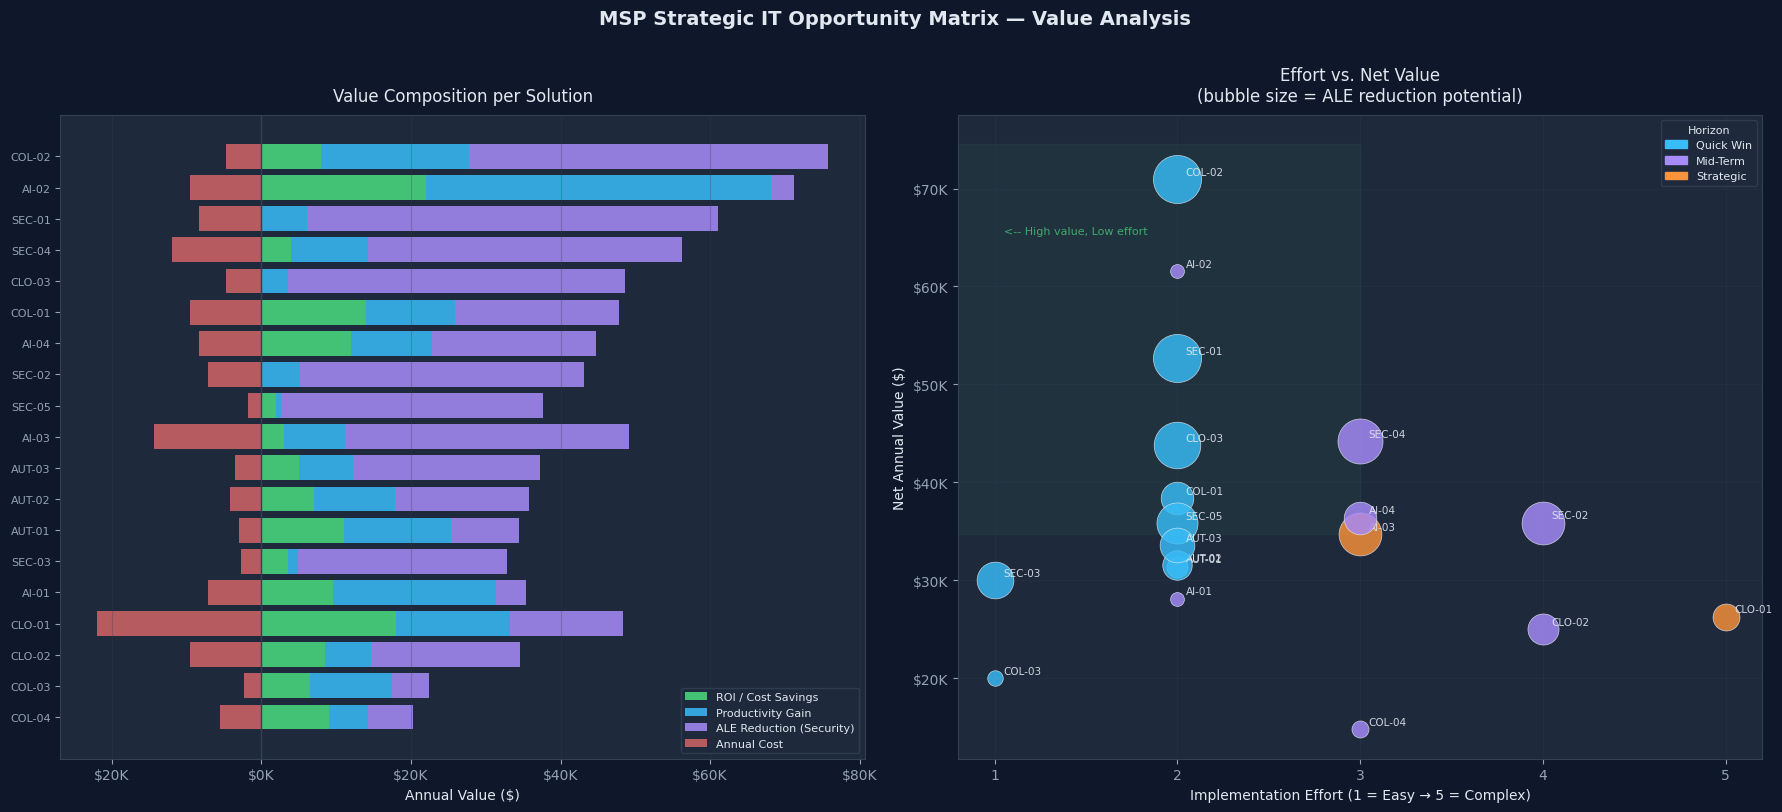

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.patch.set_facecolor('#0f172a')

# -- Left: Stacked bar — value composition per solution --------------------
ax1 = axes[0]
sorted_df = df.sort_values('net_value', ascending=True)
ids = sorted_df['id']
y  = range(len(ids))

b1 = ax1.barh(y, sorted_df['roi_annual'],            color=SUCCESS,  alpha=0.85, label='ROI / Cost Savings')
b2 = ax1.barh(y, sorted_df['productivity_annual'],   color=ACCENT,   alpha=0.85, label='Productivity Gain',
              left=sorted_df['roi_annual'])
b3 = ax1.barh(y, sorted_df['security_ale_reduction'],color=PURPLE,   alpha=0.85, label='ALE Reduction (Security)',
              left=sorted_df['roi_annual'] + sorted_df['productivity_annual'])
ax1.barh(y, -sorted_df['cost_annual'],               color=DANGER,   alpha=0.70, label='Annual Cost')

ax1.set_yticks(y)
ax1.set_yticklabels(ids, fontsize=8)
ax1.set_xlabel('Annual Value ($)', fontsize=10)
ax1.set_title('Value Composition per Solution', fontsize=12, color='#e2e8f0', pad=10)
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${abs(x)/1000:.0f}K'))
ax1.axvline(0, color='#334155', linewidth=1)
ax1.grid(axis='x', alpha=0.3)
ax1.legend(fontsize=8, facecolor='#1e293b', edgecolor='#334155',
           labelcolor='#e2e8f0', loc='lower right')

# -- Right: Bubble — Effort vs Net Value, sized by ALE reduction -----------
ax2 = axes[1]
for _, row in df.iterrows():
    color = horizon_colors[row['horizon']]
    size  = max(100, min(1200, row['security_ale_reduction'] / 40))
    ax2.scatter(row['effort_score'], row['net_value'], s=size,
                color=color, alpha=0.82, edgecolors='#e2e8f0', linewidths=0.5, zorder=3)
    ax2.annotate(row['id'], (row['effort_score'], row['net_value']),
                 textcoords='offset points', xytext=(6, 3),
                 fontsize=7.5, color='#e2e8f0', alpha=0.9)

ax2.set_xlabel('Implementation Effort (1 = Easy → 5 = Complex)', fontsize=10)
ax2.set_ylabel('Net Annual Value ($)', fontsize=10)
ax2.set_title('Effort vs. Net Value\n(bubble size = ALE reduction potential)',
              fontsize=12, color='#e2e8f0', pad=10)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${x/1000:.0f}K'))
ax2.set_xticks(range(1,6))
ax2.grid(alpha=0.25)

# Ideal quadrant highlight
ax2.axhspan(df['net_value'].median(), df['net_value'].max()*1.05,
            xmin=0, xmax=0.5, alpha=0.05, color=SUCCESS)
ax2.text(1.05, df['net_value'].max()*0.92, '<-- High value, Low effort',
         fontsize=8, color=SUCCESS, alpha=0.7)

patches = [mpatches.Patch(color=c, label=h) for h,c in horizon_colors.items()]
ax2.legend(handles=patches, title='Horizon', fontsize=8, title_fontsize=8,
           facecolor='#1e293b', edgecolor='#334155', labelcolor='#e2e8f0')

plt.suptitle('MSP Strategic IT Opportunity Matrix — Value Analysis',
             fontsize=14, color='#e2e8f0', y=1.01, fontweight='bold')
plt.tight_layout()
plt.savefig('opportunity_value.png', dpi=150, bbox_inches='tight', facecolor='#0f172a')
plt.show()


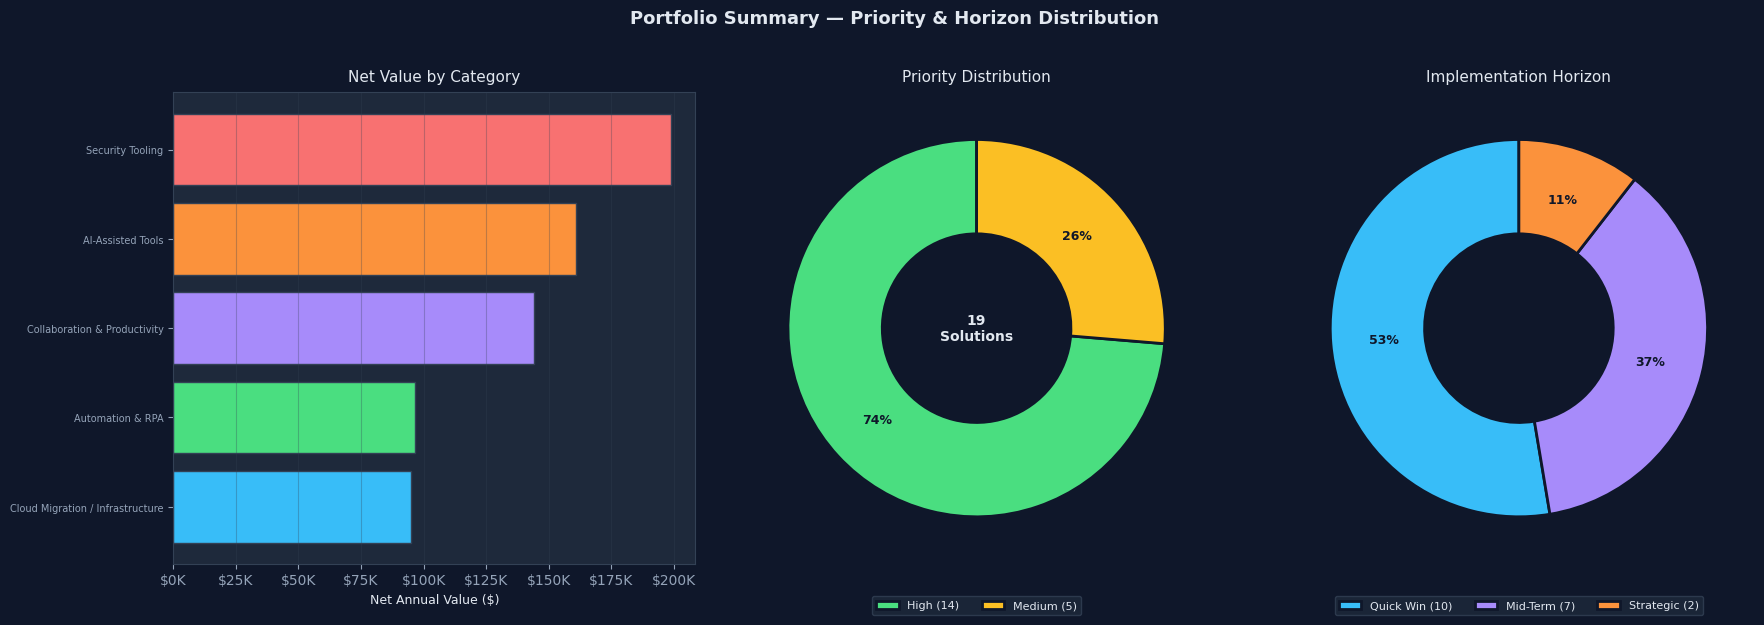

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.patch.set_facecolor('#0f172a')

# -- Left: Net value by category -------------------------------------------
ax1 = axes[0]
cat_val = df.groupby('category')['net_value'].sum().sort_values()
cat_c   = [ACCENT, SUCCESS, PURPLE, WARN, DANGER]
ax1.barh(range(len(cat_val)), cat_val.values, color=cat_c[:len(cat_val)], edgecolor='#334155')
ax1.set_yticks(range(len(cat_val)))
ax1.set_yticklabels(list(cat_val.index), fontsize=7)
ax1.set_xlabel('Net Annual Value ($)', fontsize=9)
ax1.set_title('Net Value by Category', fontsize=11, color='#e2e8f0', pad=8)
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${x/1000:.0f}K'))
ax1.grid(axis='x', alpha=0.3)

# -- Middle: Priority distribution donut -----------------------------------
ax2 = axes[1]
pri_counts = df['priority'].value_counts()
order = [p for p in ['High','Medium','Low'] if p in pri_counts.index]
colors_p = [priority_colors[p] for p in order]
wedges, _, autotexts = ax2.pie(
    [pri_counts[p] for p in order],
    colors=colors_p, autopct='%1.0f%%', pctdistance=0.72,
    startangle=90,
    wedgeprops=dict(width=0.5, edgecolor='#0f172a', linewidth=2)
)
for at in autotexts:
    at.set_fontsize(9); at.set_color('#0f172a'); at.set_fontweight('bold')
ax2.legend(wedges, [f"{p} ({pri_counts[p]})" for p in order],
           loc='lower center', bbox_to_anchor=(0.5,-0.12), ncol=3, fontsize=8,
           facecolor='#1e293b', edgecolor='#334155', labelcolor='#e2e8f0')
ax2.set_title('Priority Distribution', fontsize=11, color='#e2e8f0', pad=8)
ax2.text(0,0,str(len(df))+"\nSolutions", ha='center', va='center',
         fontsize=10, color='#e2e8f0', fontweight='bold')

# -- Right: Horizon distribution donut -------------------------------------
ax3 = axes[2]
hor_counts = df['horizon'].value_counts()
order_h = [h for h in ['Quick Win','Mid-Term','Strategic'] if h in hor_counts.index]
colors_h = [horizon_colors[h] for h in order_h]
wedges2, _, autotexts2 = ax3.pie(
    [hor_counts[h] for h in order_h],
    colors=colors_h, autopct='%1.0f%%', pctdistance=0.72,
    startangle=90,
    wedgeprops=dict(width=0.5, edgecolor='#0f172a', linewidth=2)
)
for at in autotexts2:
    at.set_fontsize(9); at.set_color('#0f172a'); at.set_fontweight('bold')
ax3.legend(wedges2, [f"{h} ({hor_counts[h]})" for h in order_h],
           loc='lower center', bbox_to_anchor=(0.5,-0.12), ncol=3, fontsize=8,
           facecolor='#1e293b', edgecolor='#334155', labelcolor='#e2e8f0')
ax3.set_title('Implementation Horizon', fontsize=11, color='#e2e8f0', pad=8)

plt.suptitle('Portfolio Summary — Priority & Horizon Distribution',
             fontsize=13, color='#e2e8f0', y=1.02, fontweight='bold')
plt.tight_layout()
plt.savefig('opportunity_summary.png', dpi=150, bbox_inches='tight', facecolor='#0f172a')
plt.show()


## 🔗 Section 3 — FAIR Register Cross-Reference
Shows how adopting each solution reduces ALE on linked risks from the FAIR register.

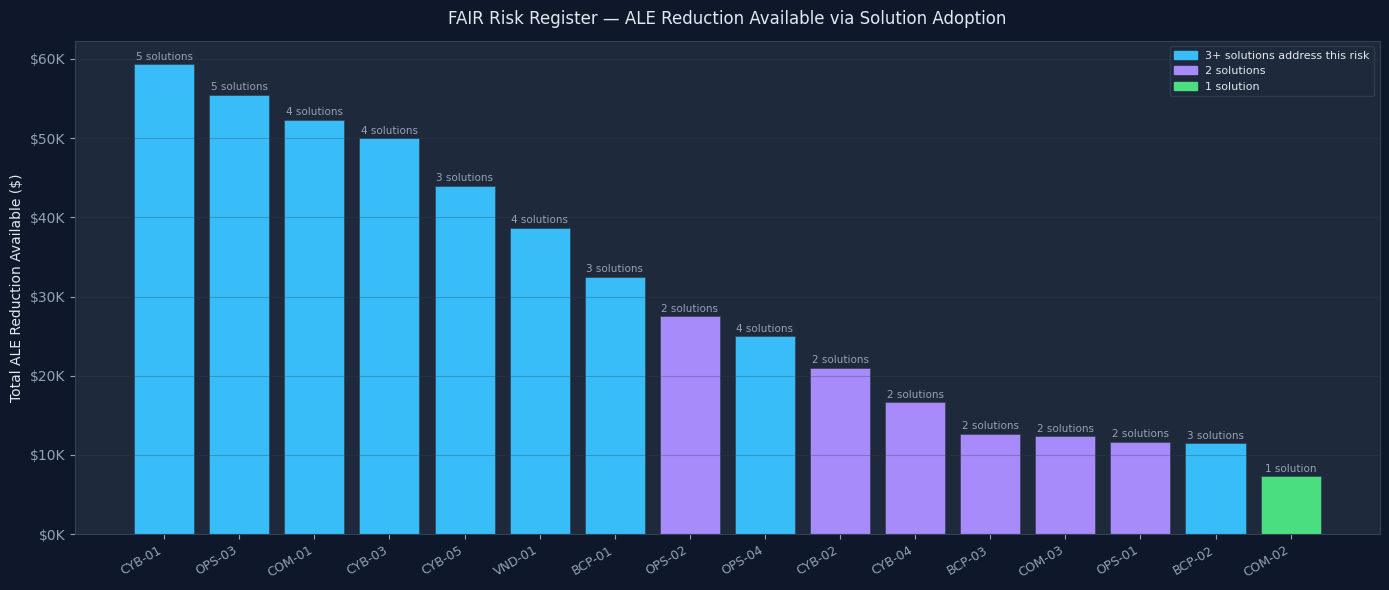


📎 Cross-Reference Table:
fair_id                      linked_solutions  solution_count total_ale_reduction
 CYB-01 SEC-01, SEC-04, AUT-02, CLO-03, AI-03               5             $59,333
 OPS-03 SEC-01, SEC-02, SEC-04, AUT-01, AI-03               5             $55,500
 COM-01         COL-02, SEC-03, SEC-05, AI-04               4             $52,333
 CYB-03        COL-01, SEC-01, SEC-02, SEC-05               4             $50,000
 CYB-05                 COL-02, SEC-04, AI-03               3             $44,000
 VND-01         SEC-02, SEC-04, AUT-02, AI-03               4             $38,667
 BCP-01                AUT-03, CLO-01, CLO-03               3             $32,500
 OPS-02                        AUT-03, CLO-03               2             $27,500
 OPS-04        COL-01, AUT-02, CLO-01, CLO-02               4             $25,000
 CYB-02                        SEC-03, SEC-05               2             $21,000
 CYB-04                        COL-01, SEC-03               2           

In [6]:
# Build a map of FAIR risk ID → total ALE reduction available from all linked solutions
fair_ale_map = {}
for _, row in df.iterrows():
    for risk_id in [r.strip() for r in row['fair_risks'].split(',')]:
        fair_ale_map.setdefault(risk_id, {'total_reduction': 0, 'solutions': []})
        fair_ale_map[risk_id]['total_reduction'] += row['security_ale_reduction'] / len(row['fair_risks'].split(','))
        fair_ale_map[risk_id]['solutions'].append(row['id'])

# Build display frame
cross_ref = pd.DataFrame([
    {'fair_id': k, 'linked_solutions': ', '.join(v['solutions']),
     'solution_count': len(v['solutions']),
     'total_ale_reduction': v['total_reduction']}
    for k, v in sorted(fair_ale_map.items())
]).sort_values('total_ale_reduction', ascending=False)

# -- Chart -----------------------------------------------------------------
fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_facecolor('#0f172a')

colors = [ACCENT if c >= 3 else PURPLE if c == 2 else SUCCESS
          for c in cross_ref['solution_count']]
bars = ax.bar(range(len(cross_ref)), cross_ref['total_ale_reduction'],
              color=colors, edgecolor='#334155', linewidth=0.5)

for i, (bar, row) in enumerate(zip(bars, cross_ref.itertuples())):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 300,
            f"{row.solution_count} solution{'s' if row.solution_count > 1 else ''}",
            ha='center', va='bottom', fontsize=7.5, color='#94a3b8')

ax.set_xticks(range(len(cross_ref)))
ax.set_xticklabels(cross_ref['fair_id'], fontsize=9, rotation=30, ha='right')
ax.set_ylabel('Total ALE Reduction Available ($)', fontsize=10)
ax.set_title('FAIR Risk Register — ALE Reduction Available via Solution Adoption',
             fontsize=12, color='#e2e8f0', pad=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${x/1000:.0f}K'))
ax.grid(axis='y', alpha=0.3)

patches = [
    mpatches.Patch(color=ACCENT,  label='3+ solutions address this risk'),
    mpatches.Patch(color=PURPLE,  label='2 solutions'),
    mpatches.Patch(color=SUCCESS, label='1 solution'),
]
ax.legend(handles=patches, fontsize=8, facecolor='#1e293b',
          edgecolor='#334155', labelcolor='#e2e8f0')

plt.tight_layout()
plt.savefig('fair_crossref.png', dpi=150, bbox_inches='tight', facecolor='#0f172a')
plt.show()

print("\n📎 Cross-Reference Table:")
print(cross_ref.to_string(index=False,
    formatters={'total_ale_reduction': '${:,.0f}'.format}))


## 🗺️ Section 4 — Client Roadmap View

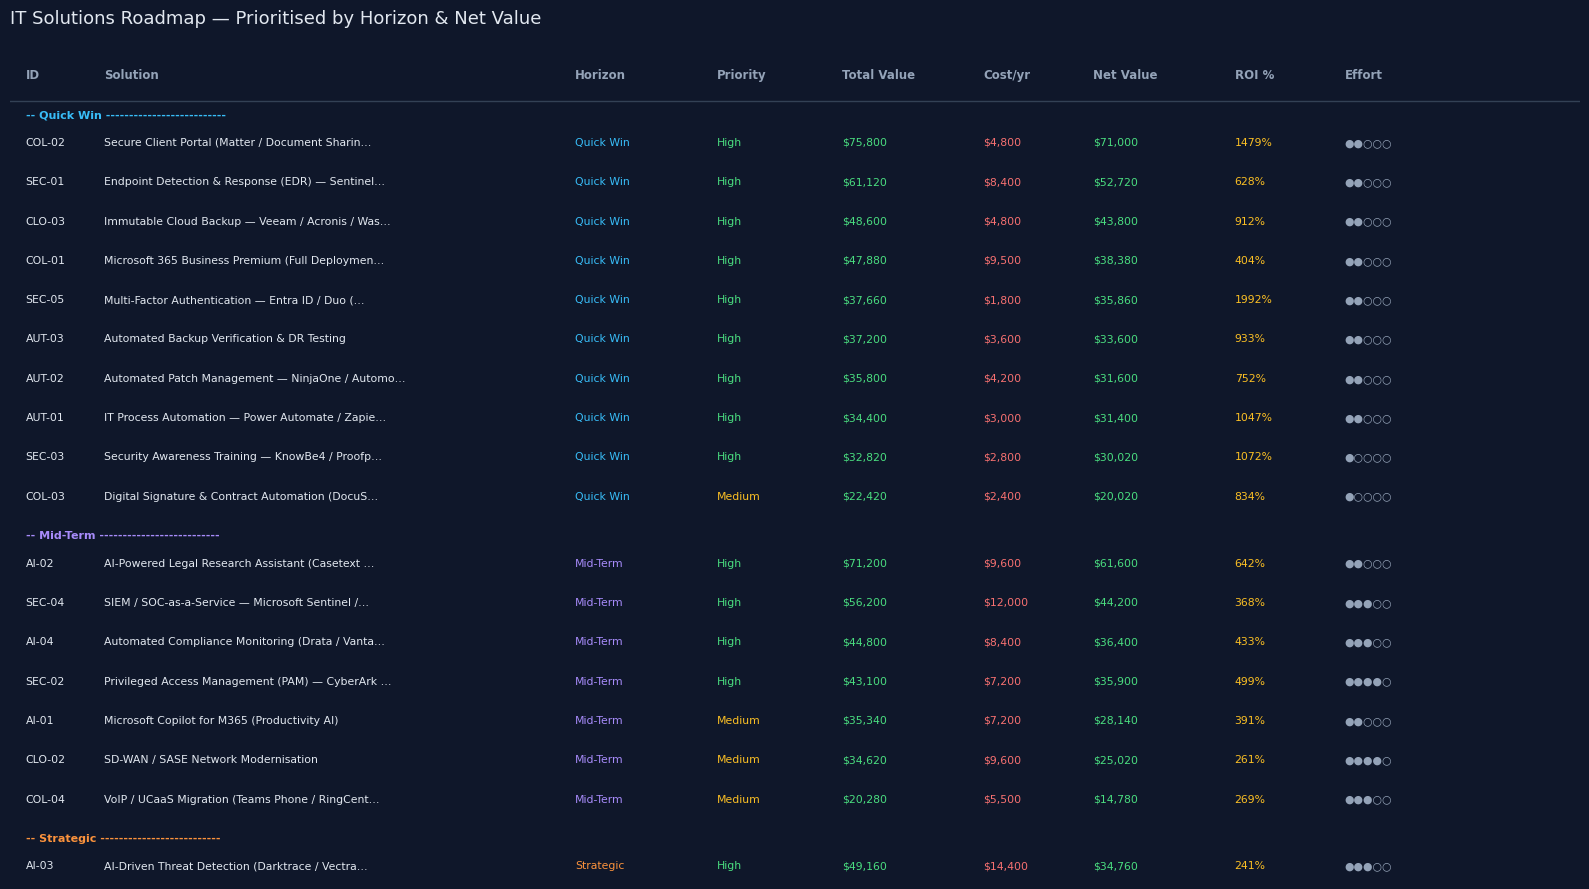

In [7]:
# Ranked roadmap table by horizon then net value
roadmap = df.copy()
horizon_order = {'Quick Win': 0, 'Mid-Term': 1, 'Strategic': 2}
roadmap['horizon_rank'] = roadmap['horizon'].map(horizon_order)
roadmap = roadmap.sort_values(['horizon_rank','net_value'], ascending=[True, False])

fig, ax = plt.subplots(figsize=(16, 9))
fig.patch.set_facecolor('#0f172a')
ax.set_facecolor('#0f172a')
ax.axis('off')

col_labels = ['ID', 'Solution', 'Horizon', 'Priority',
              'Total Value', 'Cost/yr', 'Net Value', 'ROI %', 'Effort']
col_widths  = [0.05, 0.30, 0.09, 0.08, 0.09, 0.07, 0.09, 0.07, 0.06]
x_starts    = [sum(col_widths[:i]) + 0.01 for i in range(len(col_widths))]
y_start     = 0.97
row_h       = 0.047
header_h    = 0.05

# Header
for j, (label, x) in enumerate(zip(col_labels, x_starts)):
    ax.text(x, y_start, label, fontsize=8.5, color='#94a3b8',
            fontweight='bold', va='top', transform=ax.transAxes)
ax.plot([0, 1], [y_start - header_h + 0.01]*2, color='#334155', linewidth=1, transform=ax.transAxes)

current_horizon = None
y = y_start - header_h

for _, row in roadmap.iterrows():
    if row['horizon'] != current_horizon:
        current_horizon = row['horizon']
        color = horizon_colors[current_horizon]
        ax.text(0.01, y, f"-- {current_horizon} --------------------------",
                fontsize=8, color=color, fontweight='bold', va='top',
                transform=ax.transAxes)
        y -= row_h * 0.7

    pri_c = priority_colors[row['priority']]
    hor_c = horizon_colors[row['horizon']]
    vals  = [
        row['id'],
        row['solution'][:46] + ('…' if len(row['solution']) > 46 else ''),
        row['horizon'],
        row['priority'],
        f"${row['total_value']:,.0f}",
        f"${row['cost_annual']:,.0f}",
        f"${row['net_value']:,.0f}",
        f"{row['roi_pct']:.0f}%",
        '●' * int(row['effort_score']) + '○' * (5 - int(row['effort_score'])),
    ]
    text_colors = ['#e2e8f0','#e2e8f0', hor_c, pri_c,
                   SUCCESS,'#f87171', SUCCESS if row['net_value']>0 else DANGER,
                   GOLD,'#94a3b8']

    for j, (val, x, tc) in enumerate(zip(vals, x_starts, text_colors)):
        ax.text(x, y, val, fontsize=7.8, color=tc, va='top',
                transform=ax.transAxes)
    y -= row_h
    if y < 0.03:
        break

ax.set_title('IT Solutions Roadmap — Prioritised by Horizon & Net Value',
             fontsize=13, color='#e2e8f0', pad=14, loc='left')
plt.tight_layout()
plt.savefig('roadmap.png', dpi=150, bbox_inches='tight', facecolor='#0f172a')
plt.show()


## 📝 Section 5 — Executive Summary (Client-Ready Output)

In [8]:
quick_wins = df[df['horizon'] == 'Quick Win']
mid_term   = df[df['horizon'] == 'Mid-Term']
strategic  = df[df['horizon'] == 'Strategic']
high_pri   = df[df['priority'] == 'High']

print("=" * 75)
print("  IT OPPORTUNITY MATRIX — EXECUTIVE SUMMARY")
print("  MSP Portfolio | SMB & Legal Sector")
print("=" * 75)

tv  = df['total_value'].sum()
tc  = df['cost_annual'].sum()
nv  = df['net_value'].sum()
ale = df['security_ale_reduction'].sum()
roi = df['roi_annual'].sum()
prod= df['productivity_annual'].sum()
lines = [
    "",
    "PORTFOLIO OVERVIEW",
    "------------------",
    f"  Total solutions evaluated : {len(df)}",
    f"  Total addressable value   : $" + f"{tv:>12,.0f}" + " / year",
    f"  Total solution cost       : $" + f"{tc:>12,.0f}" + " / year",
    f"  Net annual value          : $" + f"{nv:>12,.0f}" + " / year",
    f"  ALE reduction available   : $" + f"{ale:>12,.0f}" + " / year",
    "",
    "VALUE BREAKDOWN",
    "---------------",
    f"  ROI / Cost savings        : $" + f"{roi:>12,.0f}" + " / year",
    f"  Productivity gains        : $" + f"{prod:>12,.0f}" + " / year",
    f"  Security posture (ALE)    : $" + f"{ale:>12,.0f}" + " / year",
    "",
    "HORIZON SUMMARY",
    "---------------",
    f"  Quick Wins ({len(quick_wins):>2} solutions)  : $" + f"{quick_wins['net_value'].sum():>10,.0f}" + " net value",
    f"  Mid-Term   ({len(mid_term):>2} solutions)  : $" + f"{mid_term['net_value'].sum():>10,.0f}" + " net value",
    f"  Strategic  ({len(strategic):>2} solutions)  : $" + f"{strategic['net_value'].sum():>10,.0f}" + " net value",
    "",
]
print("\n".join(lines))

print("TOP 5 QUICK WINS (Implement First)")
print("-" * 75)
qw_top = quick_wins.nlargest(5, 'net_value')
for rank, (_, r) in enumerate(qw_top.iterrows(), 1):
    print(f"  {rank}. [{r['id']}] {r['solution'][:55]}")
    print(f"       Net value: ${r['net_value']:,.0f}/yr  |  Effort: {'●'*int(r['effort_score'])}{'○'*(5-int(r['effort_score']))}  |  FAIR links: {r['fair_risks']}")
    print()

print("-" * 75)
print("  Adopting all Quick Wins reduces portfolio ALE by: $" + f"{quick_wins['security_ale_reduction'].sum():,.0f}" + "/year")
print(f"  Combined with FAIR register — total risk exposure addressable: see FAIR notebook")
print("=" * 75)


  IT OPPORTUNITY MATRIX — EXECUTIVE SUMMARY
  MSP Portfolio | SMB & Legal Sector

PORTFOLIO OVERVIEW
------------------
  Total solutions evaluated : 19
  Total addressable value   : $     836,700 / year
  Total solution cost       : $     141,200 / year
  Net annual value          : $     695,500 / year
  ALE reduction available   : $     478,000 / year

VALUE BREAKDOWN
---------------
  ROI / Cost savings        : $     143,000 / year
  Productivity gains        : $     215,700 / year
  Security posture (ALE)    : $     478,000 / year

HORIZON SUMMARY
---------------
  Quick Wins (10 solutions)  : $   388,400 net value
  Mid-Term   ( 7 solutions)  : $   246,040 net value
  Strategic  ( 2 solutions)  : $    61,060 net value

TOP 5 QUICK WINS (Implement First)
---------------------------------------------------------------------------
  1. [COL-02] Secure Client Portal (Matter / Document Sharing)
       Net value: $71,000/yr  |  Effort: ●●○○○  |  FAIR links: COM-01, CYB-05

  2. [SEC-0

## 💾 Section 6 — Export to CSV

In [9]:
export = df[['id','solution','category','sector','horizon','priority',
             'roi_annual','productivity_annual','security_ale_reduction',
             'total_value','cost_annual','net_value','roi_pct',
             'effort_score','fair_risks','description']].copy()

export.columns = [
    'ID','Solution','Category','Sector','Horizon','Priority',
    'ROI ($)','Productivity ($)','ALE Reduction ($)',
    'Total Value ($)','Cost/yr ($)','Net Value ($)','ROI %',
    'Effort (1-5)','FAIR Risk Links','Description'
]
export = export.sort_values('Net Value ($)', ascending=False)
export.to_csv('it_opportunity_matrix.csv', index=False)
print("✅ Exported to it_opportunity_matrix.csv")
print(f"   {len(export)} solutions | Net portfolio value: ${export['Net Value ($)'].sum():,.0f}/yr")


✅ Exported to it_opportunity_matrix.csv
   19 solutions | Net portfolio value: $695,500/yr
